In [28]:

import importlib.util
import matplotlib.animation as animation
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.constants import c
from IPython.display import display, Math

In [29]:
from IPython.core.display import HTML
from IPython.core.pylabtools import figsize
from IPython.display import display, Math

In [30]:
lumapiFile = r"C:\\Program Files\\Lumerical\\v221\\api\\python\\lumapi.py"
spec = importlib.util.spec_from_file_location("lumapi", lumapiFile)
lumapi = importlib.util.module_from_spec(spec)
spec.loader.exec_module(lumapi)
ict_api = lumapi.INTERCONNECT(hide = False)

C:\\Program Files\\Lumerical\\v221\\api\\python\\lumapi.py:796: SyntaxWarning: invalid escape sequence '\s'
  message = re.sub('^(Error:)\s(prompt line)\s[0-9]+:', '', str(rvals[2])).strip()


In [31]:
ict_api.expressioncheckoff()

In [32]:
um = 1e-6
nm = 1e-9

In [33]:
lambda_0 = 1550*nm
delta=[562.61953067 * um,56.26195306700001 * um, 28.130976533500004 * um,]
L=50*um
neff=2.3531702
ng=4.3458796


In [49]:
ict_api.switchtodesign()
ict_api.deleteall()
ict_api.addelement('Optical Network Analyzer')
ict_api.set('name','ONA')
ict_api.set('input parameter',2)
ict_api.set('start frequency',c/(1500*nm))
ict_api.set('stop frequency',c/(1600*nm))
ict_api.setposition('ONA',0,0)

ict_api.addelement('Optical N port S-Parameter')
ict_api.set('name','combiner')
ict_api.set('load from file', 1)
ict_api.set('s parameters filename', r'C:\Users\juame\Downloads\downloads 2024 e comeco 2025\lab07\s_parameter.dat')
ict_api.setposition('combiner',200,200)
ict_api.rotateelement('combiner')
ict_api.rotateelement('combiner')
ict_api.addelement('Optical N port S-Parameter')
ict_api.set('name','splitter')
ict_api.set('load from file', 1)
ict_api.set('s parameters filename', r"C:\Users\juame\Downloads\downloads 2024 e comeco 2025\lab07\s_parameter.dat")
ict_api.setposition('splitter',-200,200)
ict_api.addelement('Straight waveguide')
ict_api.set('name','wvg01')
ict_api.set('effective index 1',neff)
ict_api.set('group index 1',ng)
ict_api.set('length',L)
ict_api.setposition('wvg01',0,150)
ict_api.addelement('Straight waveguide')
ict_api.set('name','wvg02')
ict_api.set('effective index 1',neff)
ict_api.set('group index 1',ng)
ict_api.setposition('wvg02',0,250)

ict_api.connect("ONA", "output", "splitter", "in")
ict_api.connect("splitter", "out_1", "wvg01", "port 1")
ict_api.connect("splitter", "out_2", "wvg02", "port 1")
ict_api.connect("wvg01", "port 2", "combiner", "out_2")
ict_api.connect("wvg02", "port 2", "combiner", "out_1")
ict_api.connect("combiner", "in", "ONA", "input 1")

1.0

In [50]:
ict_api.switchtodesign()
ict_api.run()

In [39]:
gain_1nm = (ict_api.getresult("ONA", "input 1/mode 1/gain"))
print(gain_1nm)

{'wavelength': array([[1.60000000e-06],
       [1.59989334e-06],
       [1.59978670e-06],
       [1.59968006e-06],
       [1.59957345e-06],
       [1.59946684e-06],
       [1.59936026e-06],
       [1.59925368e-06],
       [1.59914712e-06],
       [1.59904058e-06],
       [1.59893404e-06],
       [1.59882753e-06],
       [1.59872102e-06],
       [1.59861453e-06],
       [1.59850806e-06],
       [1.59840160e-06],
       [1.59829515e-06],
       [1.59818872e-06],
       [1.59808230e-06],
       [1.59797590e-06],
       [1.59786951e-06],
       [1.59776313e-06],
       [1.59765677e-06],
       [1.59755042e-06],
       [1.59744409e-06],
       [1.59733777e-06],
       [1.59723147e-06],
       [1.59712517e-06],
       [1.59701890e-06],
       [1.59691264e-06],
       [1.59680639e-06],
       [1.59670015e-06],
       [1.59659393e-06],
       [1.59648773e-06],
       [1.59638154e-06],
       [1.59627536e-06],
       [1.59616919e-06],
       [1.59606304e-06],
       [1.59595691e-06],
       [1.

In [43]:
type(ict_api.getresult("ONA", "input 1/mode 1/gain"))

dict

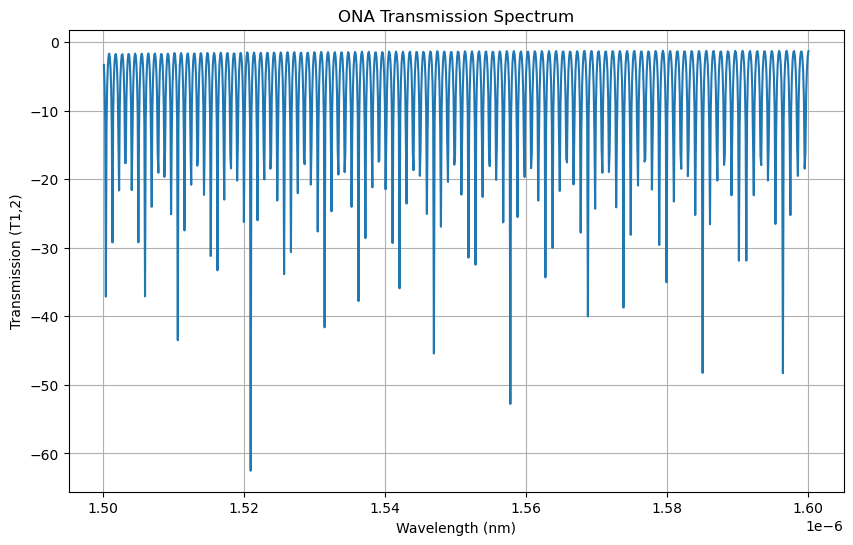

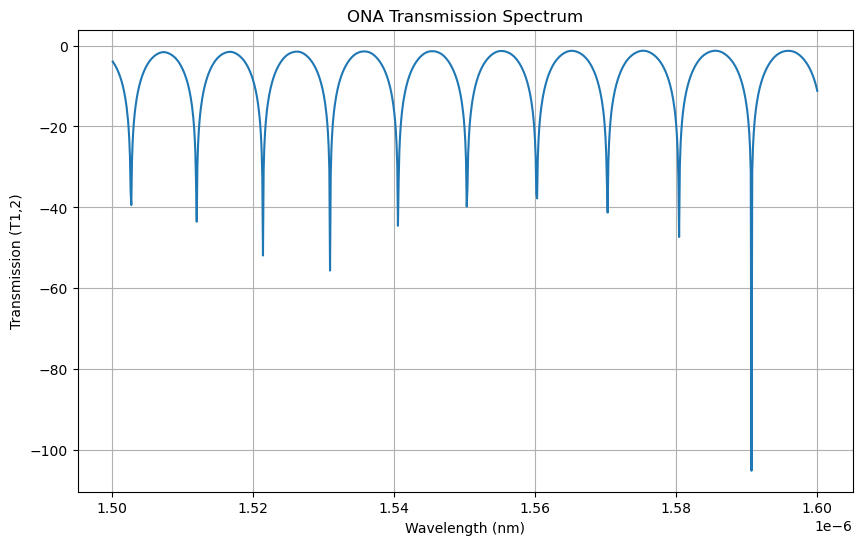

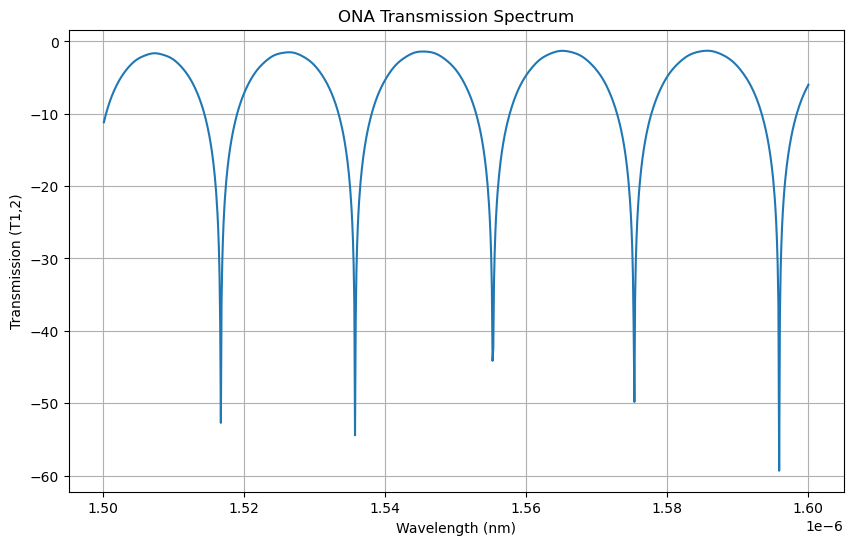

In [55]:
gain_res = []

for i in range (3):
    ict_api.switchtodesign()
    ict_api.select('wvg02')
    ict_api.set('length',L+delta[i])
    ict_api.run()
    gain = (ict_api.getresult("ONA", "input 1/mode 1/gain"))
    
    gain_res.append(gain)
    
    plt.figure(figsize=(10, 6))
    plt.plot(gain['wavelength'], gain['mode 1 gain (dB)'])
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Transmission (T1,2)')
    plt.title('ONA Transmission Spectrum')
    plt.grid(True)
    plt.show()


In [58]:
print(gain_res[1])

{'wavelength': array([[1.60000000e-06],
       [1.59989334e-06],
       [1.59978670e-06],
       [1.59968006e-06],
       [1.59957345e-06],
       [1.59946684e-06],
       [1.59936026e-06],
       [1.59925368e-06],
       [1.59914712e-06],
       [1.59904058e-06],
       [1.59893404e-06],
       [1.59882753e-06],
       [1.59872102e-06],
       [1.59861453e-06],
       [1.59850806e-06],
       [1.59840160e-06],
       [1.59829515e-06],
       [1.59818872e-06],
       [1.59808230e-06],
       [1.59797590e-06],
       [1.59786951e-06],
       [1.59776313e-06],
       [1.59765677e-06],
       [1.59755042e-06],
       [1.59744409e-06],
       [1.59733777e-06],
       [1.59723147e-06],
       [1.59712517e-06],
       [1.59701890e-06],
       [1.59691264e-06],
       [1.59680639e-06],
       [1.59670015e-06],
       [1.59659393e-06],
       [1.59648773e-06],
       [1.59638154e-06],
       [1.59627536e-06],
       [1.59616919e-06],
       [1.59606304e-06],
       [1.59595691e-06],
       [1.

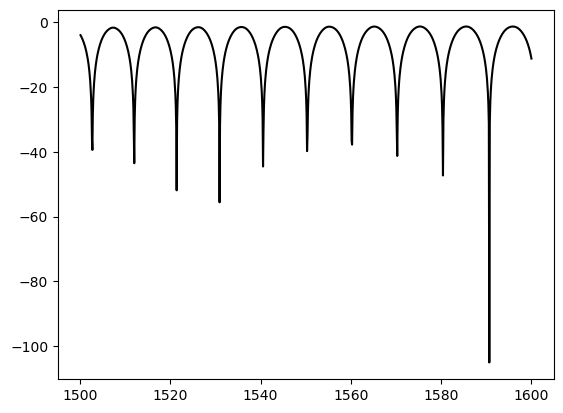

In [61]:
plt.plot(gain_res[1]['wavelength'] / nm, gain_res[1]['mode 1 gain (dB)'],
         label='ideal', color='black')